In [1]:
import sys
from tqdm import tqdm
from fitter import Fitter, get_common_distributions

sys.path.append("../")
from calculus_path_mod.term_engine import *
from calculus_path_mod.reduction_strategy import *
from calculus_path_mod.term_generation import gen_filtered_lambda_terms

from calculus_path_mod.json_serialization import load_terms
from calculus_utils.outliers_cleaning import clear_arr
from calculus_utils.drawing import draw_steps_displot

Lambda = Abstraction
App = Application

# Load terms from file

In [2]:
terms = load_terms("../terms_210_filtered_LO.dat")

# Run Experiments

In [3]:
n_strategy = LOStrategy()
steps_LO = [term.normalize(n_strategy)[1] for term in tqdm(terms, desc="LO")]

n_strategy = RandomOuterStrategy(prob_norm="softmax")
steps_RandOut_soft = [term.normalize(n_strategy)[1] for term in tqdm(terms, desc="RandO soft")]

n_strategy = RandomOuterStrategy(prob_norm="sum")
steps_RandOut_sum = [term.normalize(n_strategy)[1] for term in tqdm(terms, desc="Rand0 sum")]

n_strategy = RandomOuterStrategy(prob_norm="pow_2")
steps_RandOut_pow_2 = [term.normalize(n_strategy)[1] for term in tqdm(terms, desc="RandO pow2")]

n_strategy = RandomInnerStrategy(prob_norm="softmax")
steps_RandIn_soft = [term.normalize(n_strategy)[1] for term in tqdm(terms, desc="RandI soft")]

n_strategy = RandomInnerStrategy(prob_norm="sum")
steps_RandIn_sum = [term.normalize(n_strategy)[1] for term in tqdm(terms, desc="RandI sum")]

n_strategy = RandomInnerStrategy(prob_norm="pow_2")
steps_RandIn_pow_2 = [term.normalize(n_strategy)[1] for term in tqdm(terms, desc="RandI pow2")]

RandI pow2: 100%|██████████| 226/226 [00:08<00:00, 25.74it/s] 


# Get Expected Values

In [4]:
def get_expected_steps(steps):
    steps = list(filter(lambda x: x != float("inf"), steps))
    steps = list(filter(lambda x: x != 0, steps))

    distributions = get_common_distributions()
    distributions.remove("expon")
    f_ln = Fitter([np.log(step) for step in steps], distributions=distributions)
    f_ln.fit()

    mu, sigma = f_ln.fitted_param["norm"]
    result = np.e ** (mu + (sigma ** 2) / 2)
    return result

In [5]:
expected_values = dict()
expected_values["LO"] = get_expected_steps(steps_LO)

expected_values["RandOut_soft"] = get_expected_steps(steps_RandOut_soft)
expected_values["RandOut_sum"] = get_expected_steps(steps_RandOut_sum)
expected_values["RandOut_pow2"] = get_expected_steps(steps_RandOut_pow_2)

expected_values["RandIn_soft"] = get_expected_steps(steps_RandIn_soft)
expected_values["RandIn_sum"] = get_expected_steps(steps_RandIn_sum)
expected_values["RandIn_pow2"] = get_expected_steps(steps_RandIn_pow_2)

Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.87it/s]


In [6]:
for key, val in expected_values.items():
    print(f"{key}: {val}")

LO: 7.7476494321781155
RandOut_soft: 8.460576268080423
RandOut_sum: 9.235495508368498
RandOut_pow2: 8.733539683779732
RandIn_soft: 9.465578084088035
RandIn_sum: 9.524950618676161
RandIn_pow2: 9.611591159258351


# Compare Results

## LO vs RandOut soft vs RandOut sum vs RandOut pow 2

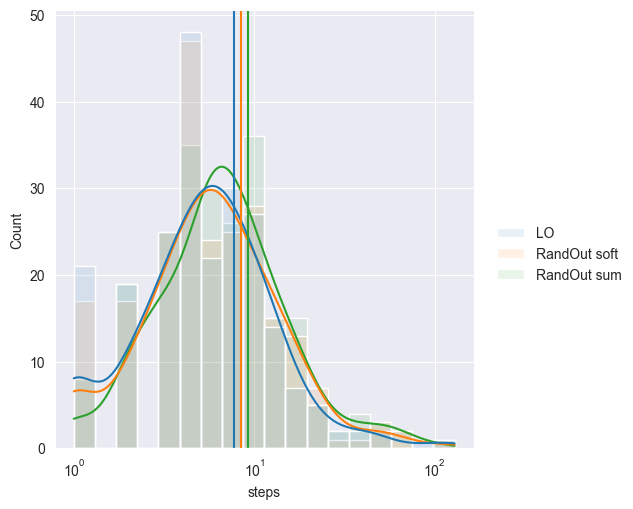

In [7]:
draw_steps_displot(data_to_draw={"LO": steps_LO,
                                 "RandOut soft": steps_RandOut_soft,
                                 "RandOut sum": steps_RandOut_sum},
                   y_lines=(expected_values["LO"], expected_values["RandOut_soft"], expected_values["RandOut_sum"]),
                   multiple="layer", element="bars", alpha=0.1)

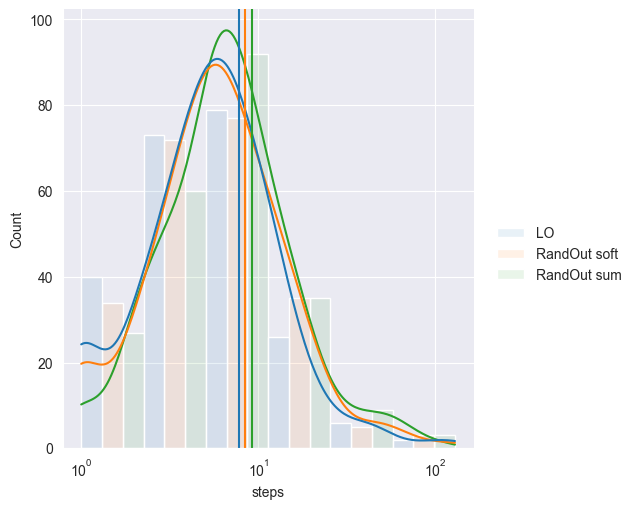

In [25]:
draw_steps_displot(data_to_draw={"LO": steps_LO,
                                 "RandOut soft": steps_RandOut_soft,
                                 "RandOut sum": steps_RandOut_sum},
                   y_lines=(expected_values["LO"], expected_values["RandOut_soft"], expected_values["RandOut_sum"]),
                   multiple="dodge", element="bars", alpha=0.1, bins=6)

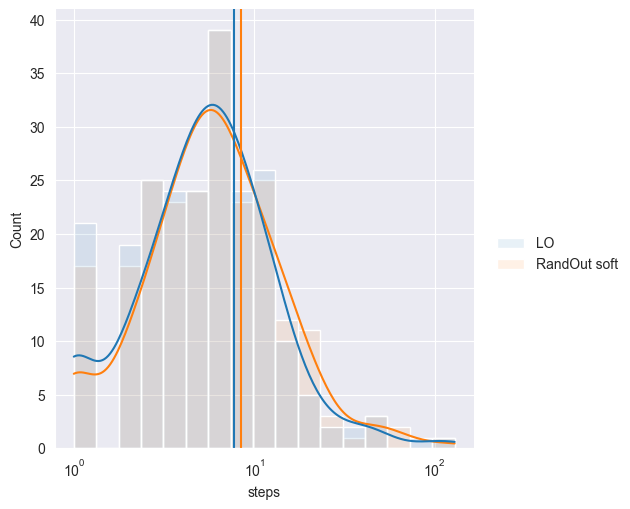

In [8]:
draw_steps_displot(data_to_draw={"LO": steps_LO,
                                 "RandOut soft": steps_RandOut_soft},
                   y_lines=(expected_values["LO"], expected_values["RandOut_soft"]),
                   multiple="layer", element="bars", alpha=0.1)

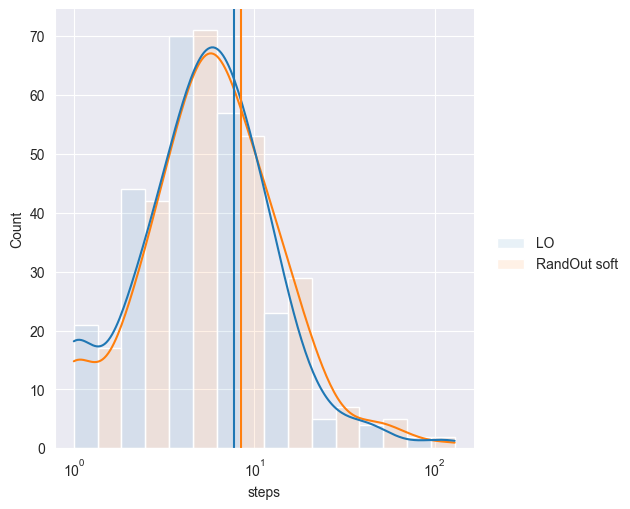

In [21]:
draw_steps_displot(data_to_draw={"LO": steps_LO,
                                 "RandOut soft": steps_RandOut_soft},
                   y_lines=(expected_values["LO"], expected_values["RandOut_soft"]),
                   multiple="dodge", element="bars", alpha=0.1, bins=8)

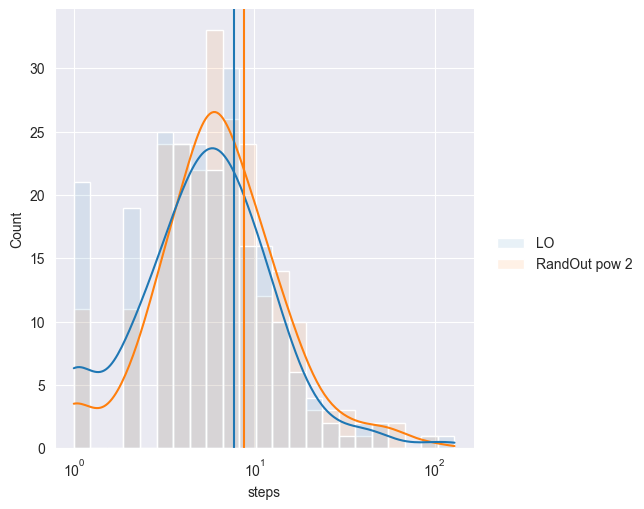

In [9]:
draw_steps_displot(data_to_draw={"LO": steps_LO,
                                 "RandOut pow 2": steps_RandOut_pow_2},
                   y_lines=(expected_values["LO"], expected_values["RandOut_pow2"]),
                   multiple="layer", element="bars", alpha=0.1)

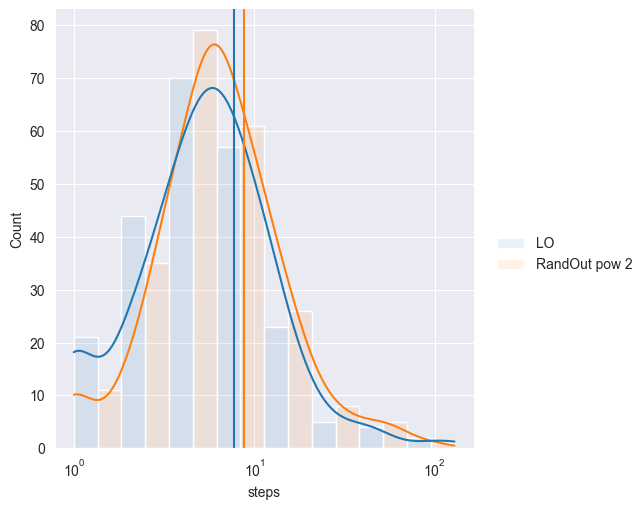

In [22]:
draw_steps_displot(data_to_draw={"LO": steps_LO,
                                 "RandOut pow 2": steps_RandOut_pow_2},
                   y_lines=(expected_values["LO"], expected_values["RandOut_pow2"]),
                   multiple="dodge", element="bars", alpha=0.1, bins=8)

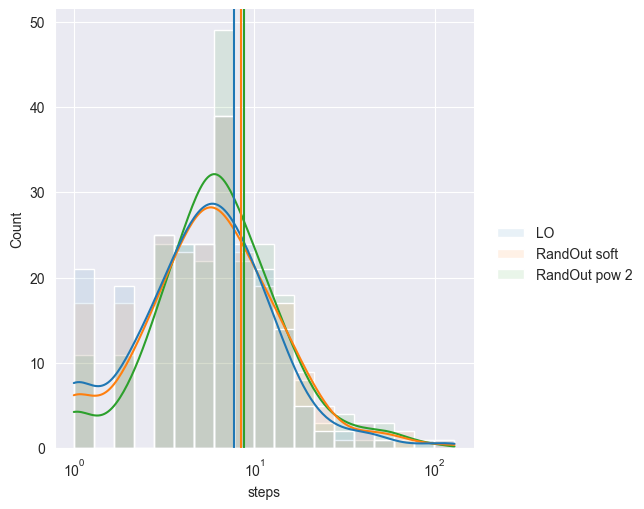

In [10]:
draw_steps_displot(data_to_draw={"LO": steps_LO,
                                 "RandOut soft": steps_RandOut_soft,
                                 "RandOut pow 2": steps_RandOut_pow_2},
                   y_lines=(expected_values["LO"], expected_values["RandOut_soft"], expected_values["RandOut_pow2"]),
                   multiple="layer", element="bars", alpha=0.1)

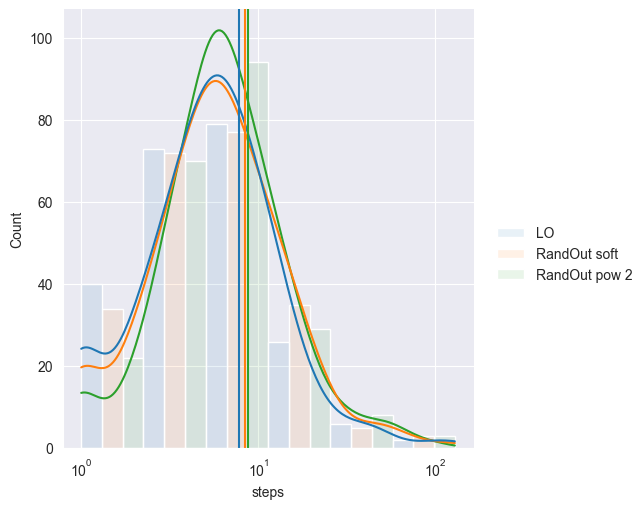

In [24]:
draw_steps_displot(data_to_draw={"LO": steps_LO,
                                 "RandOut soft": steps_RandOut_soft,
                                 "RandOut pow 2": steps_RandOut_pow_2},
                   y_lines=(expected_values["LO"], expected_values["RandOut_soft"], expected_values["RandOut_pow2"]),
                   multiple="dodge", element="bars", alpha=0.1, bins=6)

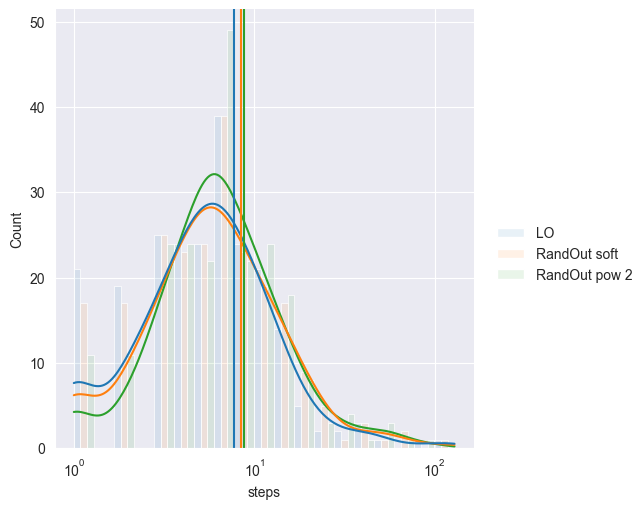

In [11]:
draw_steps_displot(data_to_draw={"LO": steps_LO,
                                 "RandOut soft": steps_RandOut_soft,
                                 "RandOut pow 2": steps_RandOut_pow_2},
                   y_lines=(expected_values["LO"], expected_values["RandOut_soft"], expected_values["RandOut_pow2"]),
                   multiple="dodge", element="bars", alpha=0.1)

## LO vs RandIn soft vs RandIn sum vs RandIn pow 2

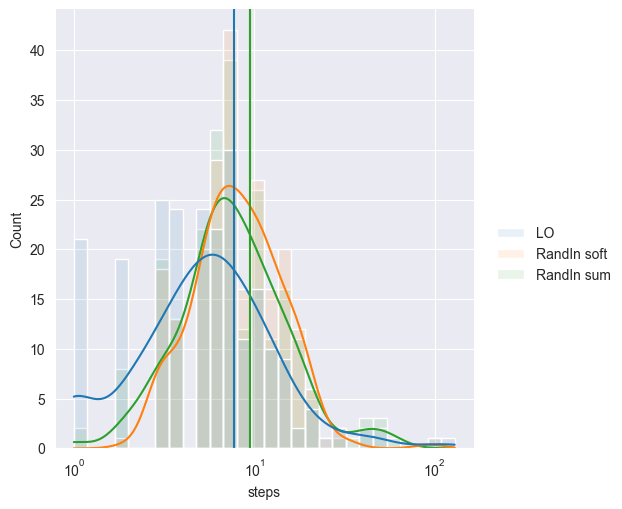

In [12]:
draw_steps_displot(data_to_draw={"LO": steps_LO,
                                 "RandIn soft": steps_RandIn_soft,
                                 "RandIn sum": steps_RandIn_sum},
                   y_lines=(expected_values["LO"], expected_values["RandIn_soft"], expected_values["RandIn_sum"]),
                   multiple="layer", element="bars", alpha=0.1)

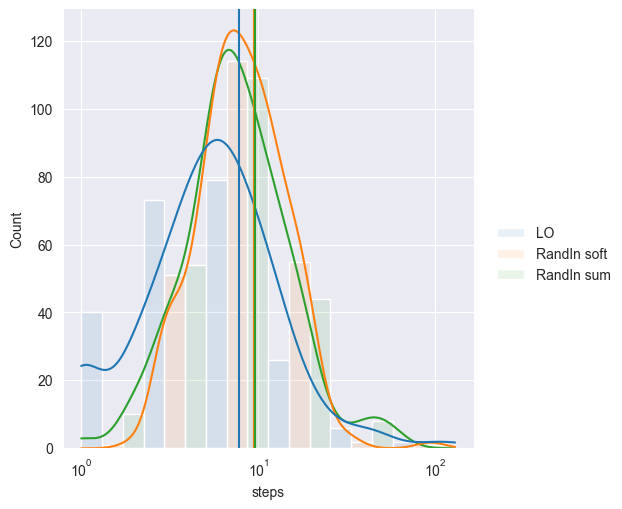

In [26]:
draw_steps_displot(data_to_draw={"LO": steps_LO,
                                 "RandIn soft": steps_RandIn_soft,
                                 "RandIn sum": steps_RandIn_sum},
                   y_lines=(expected_values["LO"], expected_values["RandIn_soft"], expected_values["RandIn_sum"]),
                   multiple="dodge", element="bars", alpha=0.1, bins=6)

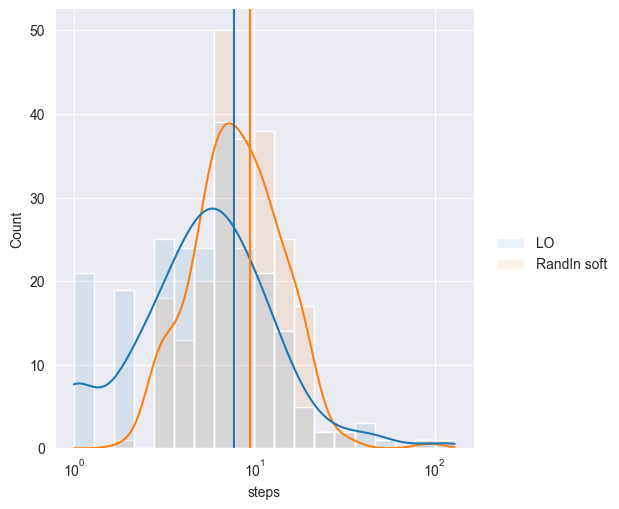

In [13]:
draw_steps_displot(data_to_draw={"LO": steps_LO,
                                 "RandIn soft": steps_RandIn_soft},
                   y_lines=(expected_values["LO"], expected_values["RandIn_soft"]),
                   multiple="layer", element="bars", alpha=0.1)

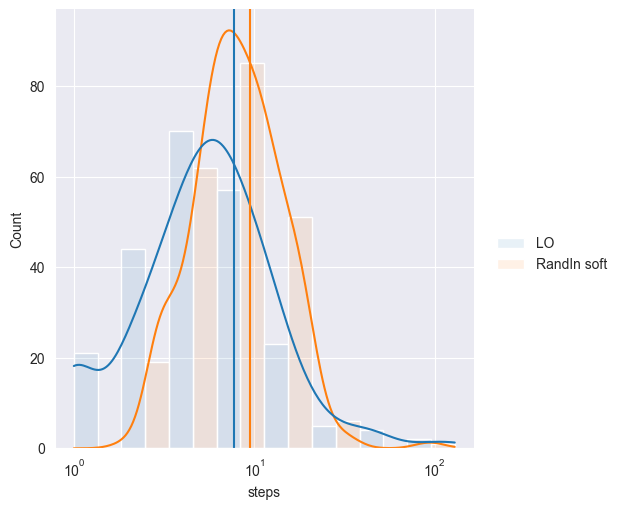

In [27]:
draw_steps_displot(data_to_draw={"LO": steps_LO,
                                 "RandIn soft": steps_RandIn_soft},
                   y_lines=(expected_values["LO"], expected_values["RandIn_soft"]),
                   multiple="dodge", element="bars", alpha=0.1, bins=8)

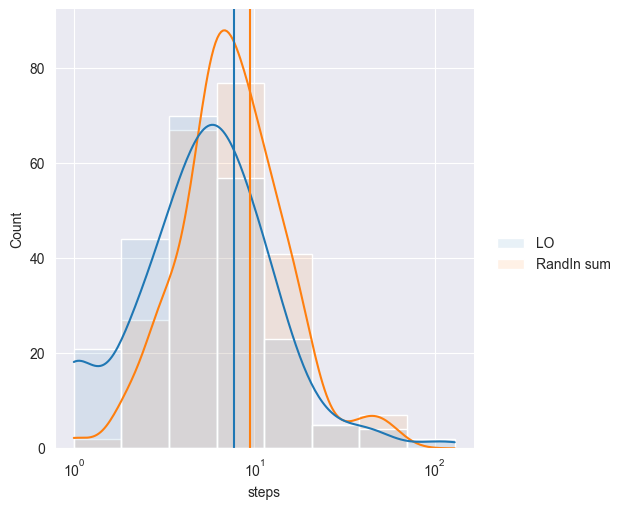

In [29]:
draw_steps_displot(data_to_draw={"LO": steps_LO,
                                 "RandIn sum": steps_RandIn_sum},
                   y_lines=(expected_values["LO"], expected_values["RandIn_sum"]),
                   multiple="layer", element="bars", alpha=0.1)

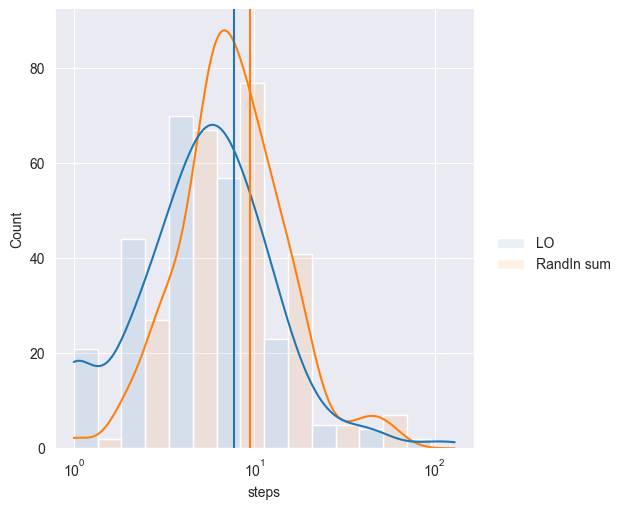

In [28]:
draw_steps_displot(data_to_draw={"LO": steps_LO,
                                 "RandIn sum": steps_RandIn_sum},
                   y_lines=(expected_values["LO"], expected_values["RandIn_sum"]),
                   multiple="dodge", element="bars", alpha=0.1, bins=8)

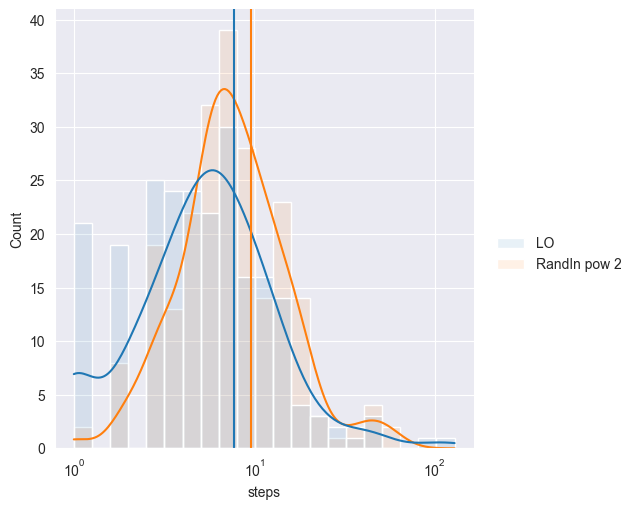

In [15]:
draw_steps_displot(data_to_draw={"LO": steps_LO,
                                 "RandIn pow 2": steps_RandIn_sum},
                   y_lines=(expected_values["LO"], expected_values["RandIn_pow2"]),
                   multiple="layer", element="bars", alpha=0.1)

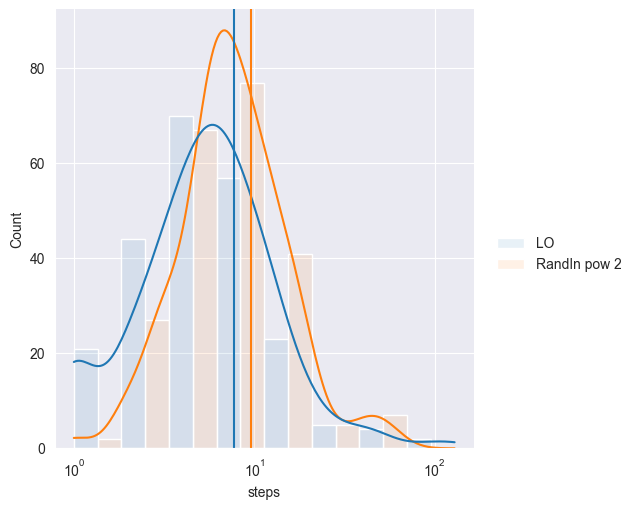

In [30]:
draw_steps_displot(data_to_draw={"LO": steps_LO,
                                 "RandIn pow 2": steps_RandIn_sum},
                   y_lines=(expected_values["LO"], expected_values["RandIn_pow2"]),
                   multiple="dodge", element="bars", alpha=0.1, bins=8)

## RandOut pow 2 vs RandIn pow 2

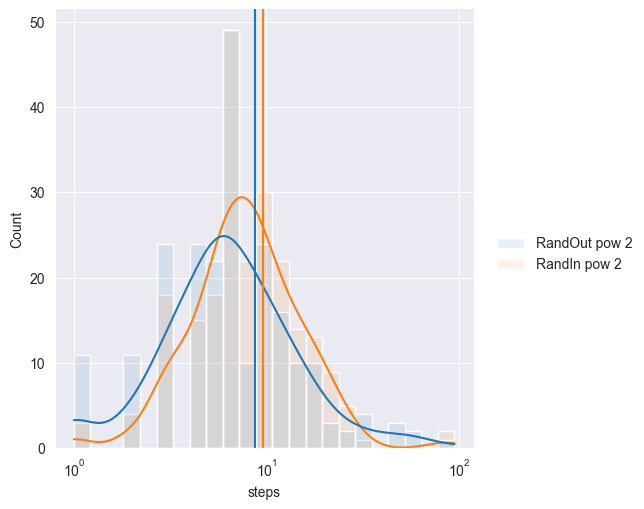

In [16]:
draw_steps_displot(data_to_draw={"RandOut pow 2": steps_RandOut_pow_2,
                                 "RandIn pow 2": steps_RandIn_pow_2},
                   y_lines=(expected_values["RandOut_pow2"], expected_values["RandIn_pow2"]),
                   multiple="layer", element="bars", alpha=0.1)

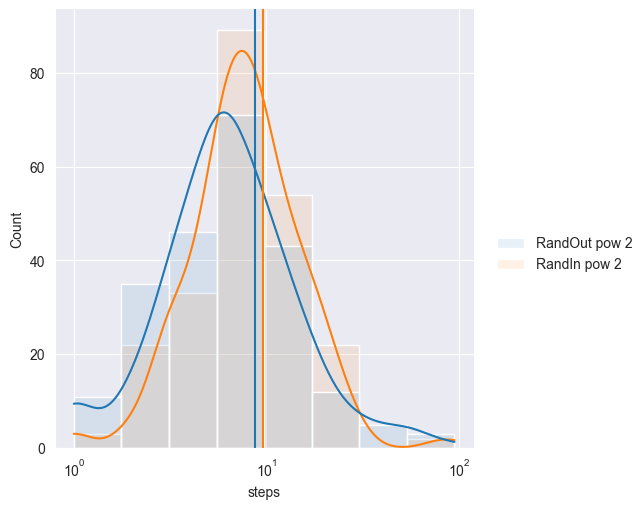

In [31]:
draw_steps_displot(data_to_draw={"RandOut pow 2": steps_RandOut_pow_2,
                                 "RandIn pow 2": steps_RandIn_pow_2},
                   y_lines=(expected_values["RandOut_pow2"], expected_values["RandIn_pow2"]),
                   multiple="layer", element="bars", alpha=0.1, bins=8)

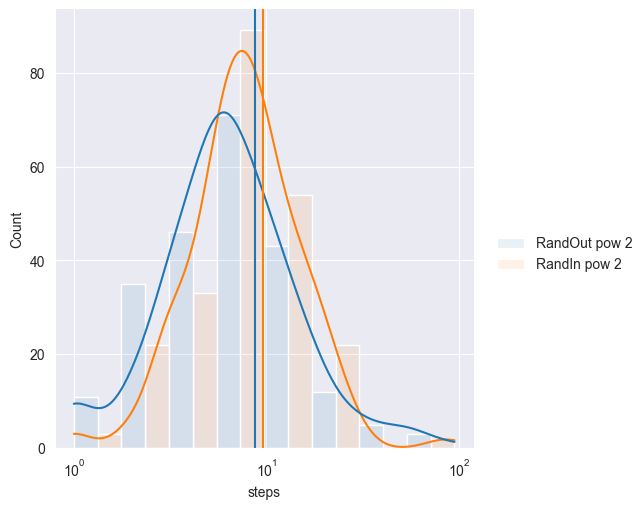

In [32]:
draw_steps_displot(data_to_draw={"RandOut pow 2": steps_RandOut_pow_2,
                                 "RandIn pow 2": steps_RandIn_pow_2},
                   y_lines=(expected_values["RandOut_pow2"], expected_values["RandIn_pow2"]),
                   multiple="dodge", element="bars", alpha=0.1, bins=8)